In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

# Check if a GPU is available
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print(f"Using GPU: {gpus[0]}")
else:
    print("No GPU found, using CPU.")

# Optional: Limit GPU memory growth (optional, for better resource management)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Now TensorFlow will automatically use the GPU when needed


No GPU found, using CPU.


In [3]:
!pip install pandas pyarrow

In [4]:
# import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [5]:
import pandas as pd

# Path to the Parquet file in your Google Drive
file_path = '/content/drive/MyDrive/train-00000-of-00001.parquet'

# Read the Parquet file
df = pd.read_parquet(file_path)

In [6]:
# Display basic info about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB
None


In [7]:
print(df.describe())

               label
count  416809.000000
mean        1.554271
std         1.490453
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         5.000000


In [8]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [9]:
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [10]:
df.shape

(416809, 2)

In [11]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5])

In [12]:
df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [13]:
df['text_len'] = df['text'].apply(len)

In [14]:
import nltk

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize



#Download the stopwords

nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:

def remove_stop_words(text):

    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(text)

    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]

    return ' '.join(filtered_text)

In [16]:
df['filtered text'] = df['text'].apply(remove_stop_words)

In [17]:
from wordcloud import WordCloud

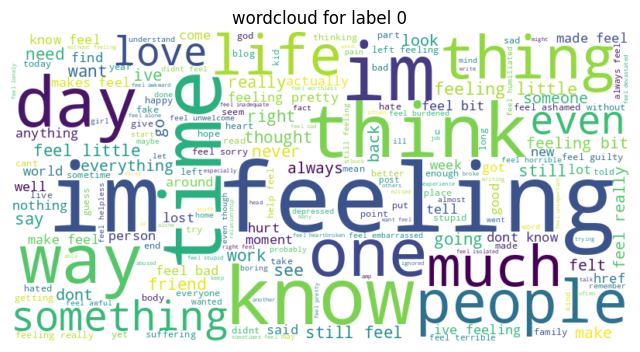

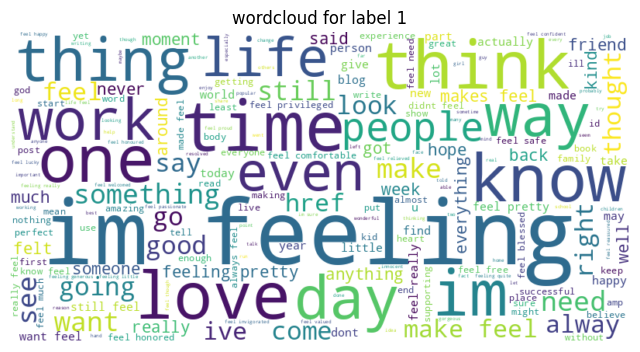

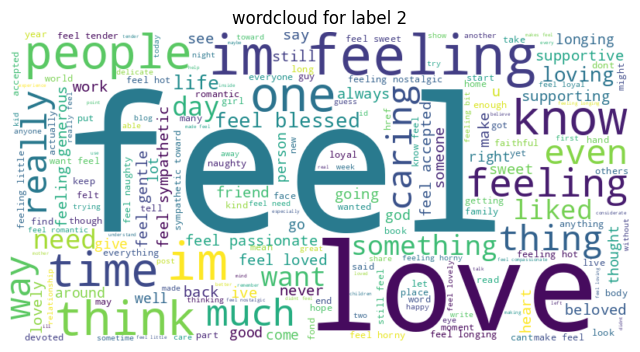

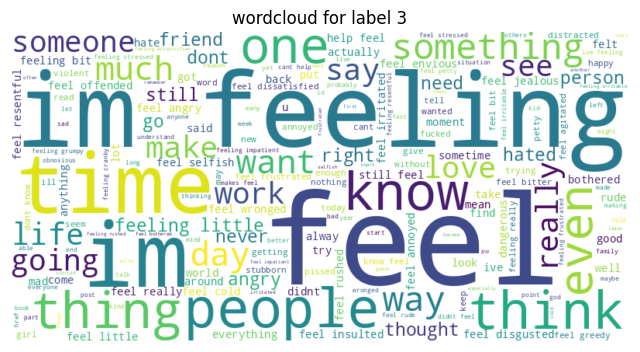

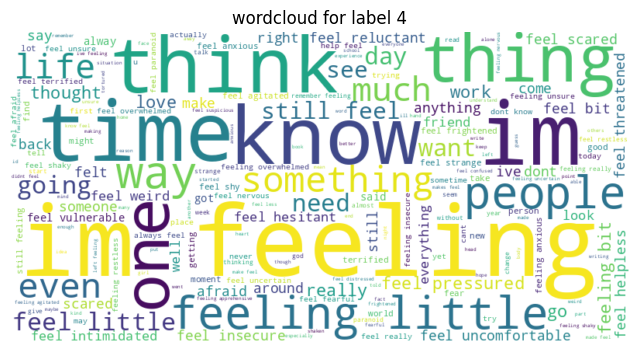

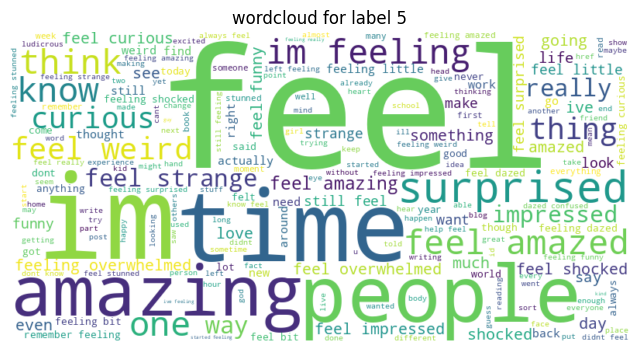

In [18]:
for label in df['label'].unique():

    text = ' '.join(df[df['label'] == label]['filtered text'])

    wordcloud = WordCloud(height=400, width=800, background_color='white').generate(text)





    plt.figure(figsize=(8,6))

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis('off')

    plt.title(f'wordcloud for label {label}')

    plt.show()


In [19]:
!pip install textblob

In [20]:
from textblob import TextBlob

In [21]:
df['sentiments'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
df.head()

,text,label,text_len,filtered text,sentiments
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000
1,im alone i feel awful,0,21,im alone feel awful,-1.000000
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750


In [23]:
def sentiment_analyzer(text):

    if text > 0:

        return "Positive"

    elif text == 0:

        return "Neutral"

    else:

        return "Negative"

In [24]:
df['sentiment'] = df['sentiments'].apply(sentiment_analyzer)

In [25]:
df.head()

,text,label,text_len,filtered text,sentiments,sentiment
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000,Negative
1,im alone i feel awful,0,21,im alone feel awful,-1.000000,Negative
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091,Positive
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875,Negative
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750,Positive


In [26]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,199953
Negative,135170
Neutral,81686


In [27]:
from collections import Counter

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


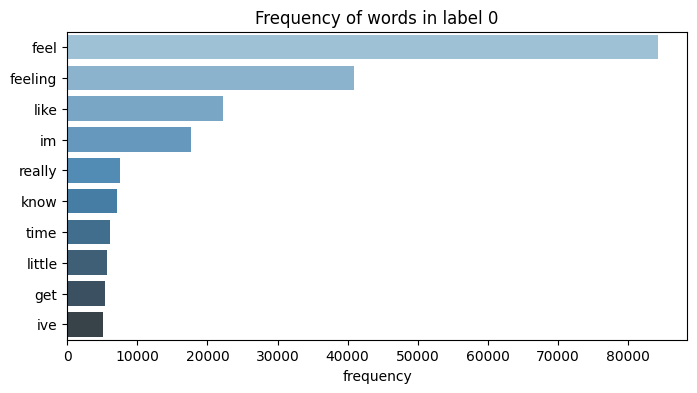

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


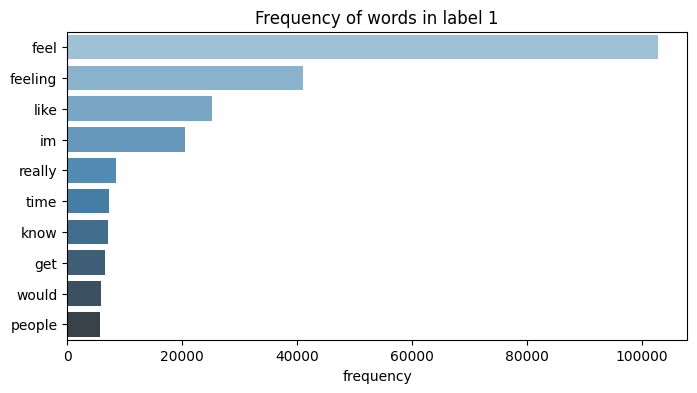

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


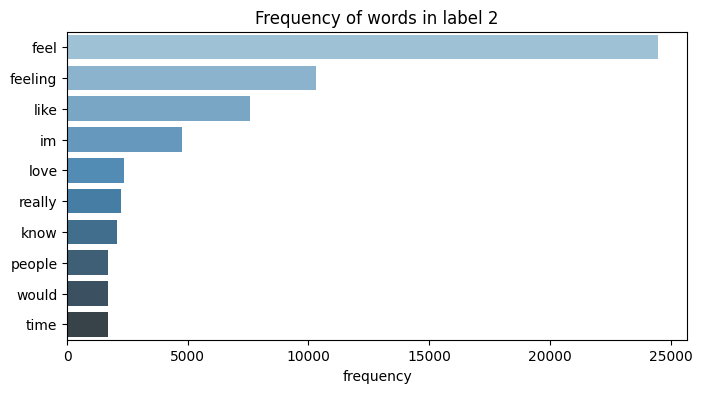

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


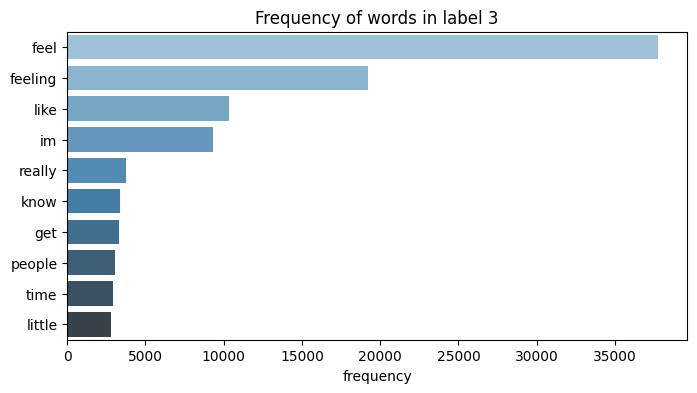

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


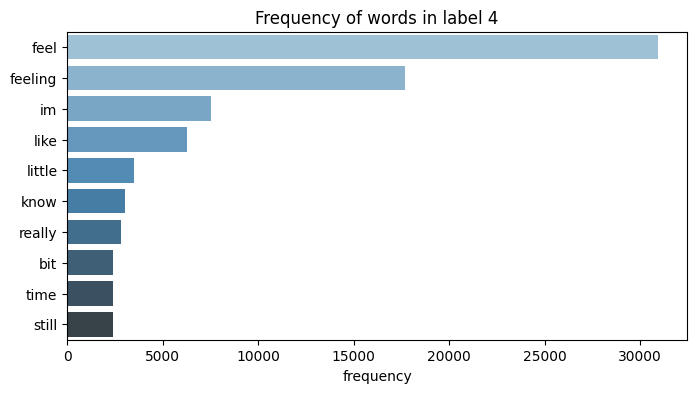

<ipython-input-28-db11c3259312>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(word), palette="Blues_d")


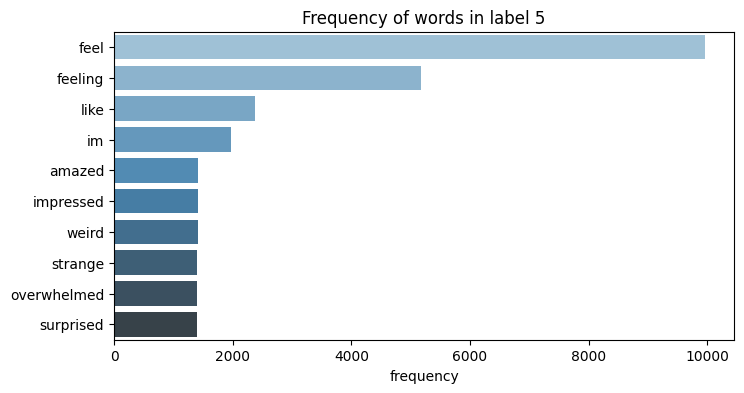

In [28]:
for label in df['label'].unique():

    text = " ".join(df[df['label'] == label]['filtered text']).split()

    most_common = Counter(text).most_common(10)

    word, counts = zip(*most_common)



    plt.figure(figsize=(8,4))

    sns.barplot(x=list(counts), y=list(word), palette="Blues_d")

    plt.title(f"Frequency of words in label {label}")

    plt.xlabel('frequency')

    plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
def plot_top_ngrams(corpus, n=None):

    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    words, count = zip(*words_freq)



    plt.figure(figsize=(10, 5))

    sns.barplot(x=list(count), y=list(words), hue=list(words))

    plt.title('Top 10 Bigrams')

    plt.xlabel('Frequency')

    plt.show()

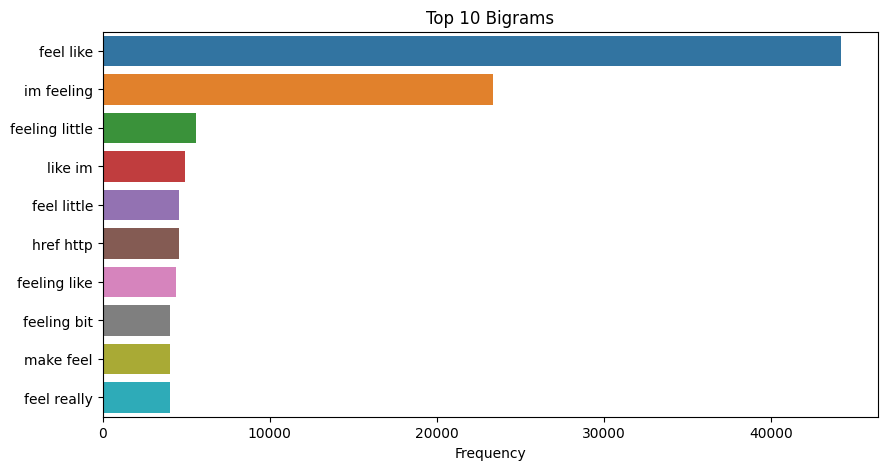

In [31]:
plot_top_ngrams(df['filtered text'], n=10)

<ipython-input-32-860f315875b7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='cividis')


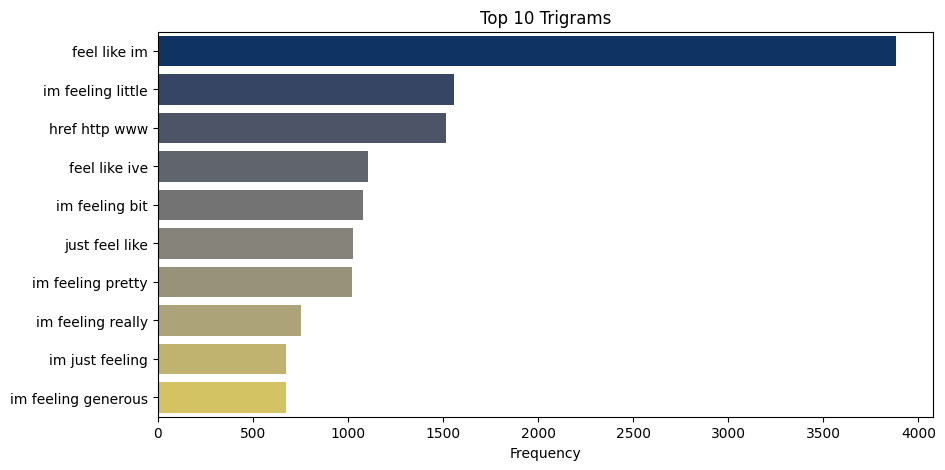

In [32]:
def plot_top_trigrams(corpus, n=None):

    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    words, counts = zip(*words_freq)



    plt.figure(figsize=(10, 5))

    sns.barplot(x=list(counts), y=list(words), palette='cividis')

    plt.title('Top 10 Trigrams')

    plt.xlabel('Frequency')

    plt.show()



plot_top_trigrams(df['text'], n=10)

In [33]:
!pip install textstat

from textstat import syllable_count

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.9 MB/s eta 0:00:00


<ipython-input-34-34f61bb3a2e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y='syllable count', palette='Set2')


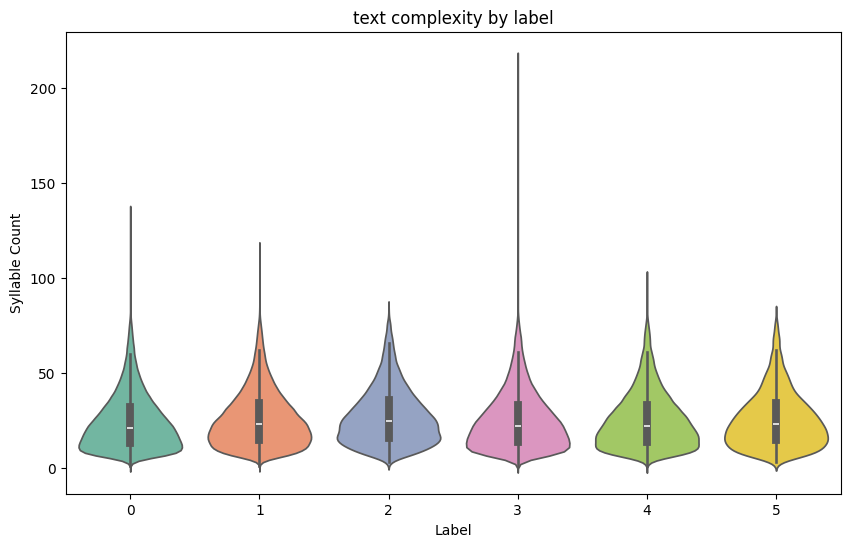

In [34]:
df['syllable count'] = df['text'].apply(syllable_count)

plt.figure(figsize=(10,6))

sns.violinplot(data=df, x='label', y='syllable count', palette='Set2')

plt.title('text complexity by label')

plt.xlabel('Label')

plt.ylabel('Syllable Count')

plt.show()

In [35]:
from textstat import flesch_reading_ease

In [36]:
df['text readability'] = df['text'].apply(flesch_reading_ease)

In [37]:
df.head()

,text,label,text_len,filtered text,sentiments,sentiment,syllable count,text readability
0,i feel awful about it too because it s my job ...,0,112,feel awful job get position succeed happen,-1.000000,Negative,32,78.93
1,im alone i feel awful,0,21,im alone feel awful,-1.000000,Negative,6,100.24
2,ive probably mentioned this before but i reall...,1,152,ive probably mentioned really feel proud actua...,0.284091,Positive,43,44.07
3,i was feeling a little low few days back,0,40,feeling little low days back,-0.096875,Negative,11,96.18
4,i beleive that i am much more sensitive to oth...,2,99,beleive much sensitive peoples feelings tend c...,0.243750,Positive,26,70.13


In [38]:
X = df['text']

y = df['sentiment']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)

In [41]:
dt_classifier = DecisionTreeClassifier()

#Train the model

dt_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data

dt_y_pred = dt_classifier.predict(X_test_vec)

In [42]:
knn_classifier = KNeighborsClassifier()

# Train the KNN Classifier

knn_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data

knn_y_pred = knn_classifier.predict(X_test_vec)

In [43]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier()


#Train  the RF-Classifier

rf_classifier.fit(X_train_vec, y_train)


# Predicting the Test data results

rf_y_pred = rf_classifier.predict(X_test_vec)

In [44]:
def evaluate_model(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)

  precision = precision_score(y_true, y_pred, average='weighted')

  recall = recall_score(y_true, y_pred, average='weighted')

  f1 = f1_score(y_true, y_pred, average='weighted')

  print(classification_report(y_true, y_pred))

  return accuracy, precision, recall, f1

In [45]:
print("Decision Tree Classifier:")

dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(y_test, dt_y_pred)

print(f"Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1-Score: {dt_f1:.4f}")

Decision Tree Classifier:
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     26956
     Neutral       0.91      0.93      0.92     16414
    Positive       0.90      0.89      0.90     39992

    accuracy                           0.89     83362
   macro avg       0.89      0.89      0.89     83362
weighted avg       0.89      0.89      0.89     83362

Accuracy: 0.8869, Precision: 0.8867, Recall: 0.8869, F1-Score: 0.8868


In [46]:
print("\nKNN Classifier:")

knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(y_test, knn_y_pred)

print(f"Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1-Score: {knn_f1:.4f}")


KNN Classifier:
              precision    recall  f1-score   support

    Negative       0.70      0.67      0.69     26956
     Neutral       0.45      0.81      0.58     16414
    Positive       0.85      0.60      0.71     39992

    accuracy                           0.67     83362
   macro avg       0.67      0.69      0.66     83362
weighted avg       0.72      0.67      0.67     83362

Accuracy: 0.6657, Precision: 0.7227, Recall: 0.6657, F1-Score: 0.6749


In [47]:
print("\nRandom Forest Classifier:")

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, rf_y_pred)

print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")


Random Forest Classifier:
              precision    recall  f1-score   support

    Negative       0.94      0.79      0.86     26956
     Neutral       0.91      0.74      0.82     16414
    Positive       0.81      0.96      0.88     39992

    accuracy                           0.86     83362
   macro avg       0.89      0.83      0.85     83362
weighted avg       0.87      0.86      0.86     83362

Accuracy: 0.8615, Precision: 0.8716, Recall: 0.8615, F1-Score: 0.8597
